# 1 Preliminary Data Cleaning, Preprocessing and EDA

- Author: Jason Truong
- Last Modified: September 19, 2022
- Email: Jasontruong19@gmail.com

# Table of Contents

1. [Objective](#1Objective)
2. [Data Dictionary](#2DataDict)
3. [Preliminary Data Cleaning](#3Preliminary)     
    3.1. [Remove Duplicated Columns](#3.1duplicated)  
    3.2. [Preprocess: 'Overall'](#3.2overall)  
    3.3. [Preprocess: 'Vote'](#3.3vote)  
    3.4. [Preprocess: 'reviewTime'](#3.4reviewTime)  
    3.5. [Preprocess: 'style'](#3.5style)   
    3.6. [Preprocess: 'verified'](#3.6verified)  
    3.7. [Preprocess: 'ASIN'](#3.7asin)  
    3.8. [Preprocess: Duplicated Rows and NaNs](#3.8droprows)  
    3.9. [Narrow down dataset](#3.9compress)  
    3.10. [Create clean dataframe for EDA](#3.10cleandf)  
    3.11. [Save data to JSON file](#3.11save)  
4. [Exploratory Data Analysis](#4EDA)  
    4.1 [What is the Review Score distribution?](#4.1reviewscore)  
    4.2 [What is the general distribution of all the categorical columns?](#4.2distribution)  
    4.3 [What is the average review score over time?](#4.3avgreviewscore)  
    4.4 [Is there a trend to the verified review counts over time?](#4.4verifiedtrend)  
    4.5 [What is the distribution of the Votes column?](#4.5votesdistribution)  
    4.6 [Feature Correlations](#4.6featurecorrelation)  
5. [Conclusion](#5conclusion)  

# 1. Objective<a class ='anchor' id='1Objective'></a>

Reviews provide users with feedback about whether a purchased product is good or not. Reviews play a big role in influencing peoples' decision to purchase a product. In this notebook, the Amazon review data will be loaded in, preproccessed and cleaned for further analysis. The cleaned review data will also be used for a preliminary exploratory data analysis to expose any trends in the data.

# 2. Data Dictionary<a class ='anchor' id='2DataDict'></a>

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>Overall</code> </td>
    <td style="text-align: left">Review score of the product given by the user.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Verified</code></td>
    <td style="text-align: left">If the reviewer actually bought the item or not (1: The user bought the item, 0: The user did not buy the item)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>ReviewTime</code></td>
    <td style="text-align: left">The date of the review.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>ReviewerID</code></td>
    <td style="text-align: left">The unique ID associated with the Reviewer's account.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>asin</code></td>
    <td style="text-align: left">The unique ID associated with the product in review</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Style</code></td>
    <td style="text-align: left">The category for the product. In this case for movies, the category includes DVD, Amazon video, Blu-Ray, etc...</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>reviewerName</code></td>
    <td style="text-align: left">The name of the reviewer reviewing the product</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>reviewText</code></td>
    <td style="text-align: left"> The text review of the product.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Summary</code></td>
    <td style="text-align: left">A short summary of the review text.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>unixReviewTime</code></td>
    <td style="text-align: left">The date of the review in unix form.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Vote</code></td>
    <td style="text-align: left">How many upvotes the review got from other Amazon users.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Image</code></td>
    <td style="text-align: left">Links to images of the product" </td>
  </tr>
</table>


# 3. Preliminary Data Cleaning <a class ='anchor' id='3Preliminary'></a>

In [1]:
# Import necessary packages.
import json
from datetime import datetime
import pandas as pd
import numpy as np

# Plotting package
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jason\anaconda3\envs\bigdata_ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Since the dataset contains 8.9 million rows of data and is 5.2 gbs, only a small subset of the data will be loaded in.

Load in the dataset

In [2]:
review_data = []

# Read in the first 2,000,000 rows from the dataset
with open('Movies_and_TV.json','r') as metafile:
    for x in range(2000000):
        review_data.append(json.loads(next(metafile)))

Create the dataframe and explore the data

In [3]:
review_df = pd.DataFrame(review_data)

In [4]:
review_df['asin'].value_counts()

B00006CXSS    24479
6305837325    16661
B00005JLF2    10051
7880879625     6709
0793906091     6386
              ...  
B00005M2EQ        1
6302707633        1
3846900117        1
3837350169        1
630348266X        1
Name: asin, Length: 15434, dtype: int64

In [5]:
review_df.info(show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   overall         2000000 non-null  float64
 1   verified        2000000 non-null  bool   
 2   reviewTime      2000000 non-null  object 
 3   reviewerID      2000000 non-null  object 
 4   asin            2000000 non-null  object 
 5   style           1869058 non-null  object 
 6   reviewerName    1999947 non-null  object 
 7   reviewText      1998502 non-null  object 
 8   summary         1999606 non-null  object 
 9   unixReviewTime  2000000 non-null  int64  
 10  vote            413317 non-null   object 
 11  image           2912 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 169.8+ MB


There are 12 columns of data with 9 object columns that will been to be convereted to numeric

## 3.1 Preprocess Duplicated Columns<a class ='anchor' id='3.1duplicated'></a>

In [6]:
review_df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"03 11, 2013",A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},jacki,really happy they got evangelised .. spoiler a...,great,1362960000,NaN,NaN
1,5.0,True,"02 18, 2013",A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Ken P,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,1361145600,3,NaN
2,5.0,False,"01 17, 2013",A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Reina Berumen,Excellent look into contextualizing the Gospel...,Peace Child,1358380800,NaN,NaN
3,5.0,True,"01 10, 2013",A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},N Coyle,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,1357776000,NaN,NaN
4,4.0,True,"12 26, 2012",A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},Jodie Vesely,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,1356480000,NaN,NaN


Looking at the columns, `reviewTime` and `unixReviewTime` may display the same information, a check will be completed to verify if they display the same information. The `reviewerName` does not provide any useful information since there is a unique `reviewerID` for each reviewer. Two reviewers can have the same name but may not be the same person. Thus `reviewerName` will be dropped. The `image` column can be dropped because this project will not deal with image data. 

**Before the `reviewerName` is dropped, it will be compared with the reviewerID column to ensure they contain the same information**

In [7]:
review_df['reviewerID'].value_counts()

A16CZRQL23NOIW    978
A2NJO6YE954DBH    920
ANCOMAI0I7LVG     876
A1GGOC9PVDXW7Z    745
A3LZGLA88K0LA0    745
                 ... 
AIBCZFUP2G8O6       1
A3NGF63TCMLWUA      1
ACZES1TSRGV7W       1
A1LRRB9W9TVL5W      1
A1KF85AQR11MDY      1
Name: reviewerID, Length: 1184787, dtype: int64

In [8]:
review_df['reviewerName'].value_counts()

Amazon Customer        116732
Kindle Customer          9982
Mike                     1880
John                     1879
Chris                    1632
                        ...  
Patrick Keegan              1
Bev Smith                   1
Joseph L. Maple Jr.         1
K. Malladi                  1
Jimie Ramos                 1
Name: reviewerName, Length: 821904, dtype: int64

The `reviewerID` and `reviewerName` column show differrent lengths. The `reviewerName` column contains less information than the `reviewerID` column because users can have the same names but reviewerID is unique. Thus reviewerID should be used.

**Verify that the `unixReviewTime` is the same as the `reviewTime` column. First the `reviewTime` will be converted to a datetime type.**

In [9]:
# Convert reviewTime column to datetime type
review_df['reviewTime'] = pd.to_datetime(review_df['reviewTime'])

# Check results
review_df['reviewTime'].dtype

dtype('<M8[ns]')

Next, convert the unixReviewTime to a datetime format.

In [10]:
# Convert unixReviewTime column to datetime type
review_df['unixReviewTime'] = pd.to_datetime(review_df['unixReviewTime'], unit = 's')

# Check results
review_df['unixReviewTime']

0         2013-03-11
1         2013-02-18
2         2013-01-17
3         2013-01-10
4         2012-12-26
             ...    
1999995   2015-08-31
1999996   2015-08-31
1999997   2015-08-30
1999998   2015-08-29
1999999   2015-08-29
Name: unixReviewTime, Length: 2000000, dtype: datetime64[ns]

Check if the column values are the same.

In [11]:
(review_df['reviewTime'] == review_df['unixReviewTime']).sum()

2000000

All rows of dates are identical so one of them can be dropped. ReviewTime will be dropped.

**The unnecessary columns can be dropped from the dataframe.**

In [12]:
# Drop the unnecessary columns
review_df.drop(columns = ['reviewTime','reviewerName','image'],inplace = True)

# Check results
review_df

,overall,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote
0,5.0,True,A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},really happy they got evangelised .. spoiler a...,great,2013-03-11,NaN
1,5.0,True,A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Having lived in West New Guinea (Papua) during...,Realistic and Accurate,2013-02-18,3
2,5.0,False,A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Excellent look into contextualizing the Gospel...,Peace Child,2013-01-17,NaN
3,5.0,True,A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,2013-01-10,NaN
4,4.0,True,A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,2012-12-26,NaN
...,...,...,...,...,...,...,...,...,...
1999995,5.0,True,A1UM0LZVGQ4RYX,B0001GF2F6,{'Format:': ' Amazon Video'},Loved it want to see more,Five Stars,2015-08-31,NaN
1999996,5.0,True,A3MWE7P29CDR5L,B0001GF2F6,{'Format:': ' Amazon Video'},Loved it wish it was more than two seasons.,Five Stars,2015-08-31,NaN
1999997,5.0,True,A3J6N3SOCENIPB,B0001GF2F6,{'Format:': ' Amazon Video'},Such a witty show with good acting. This show ...,Dark humor with lessons about life.,2015-08-30,NaN
1999998,4.0,True,A5O06SYSW6V93,B0001GF2F6,{'Format:': ' Amazon Video'},It's a weird (comical) look at Grim Reapers.,Four Stars,2015-08-29,NaN


In [13]:
# Check results
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   overall         float64       
 1   verified        bool          
 2   reviewerID      object        
 3   asin            object        
 4   style           object        
 5   reviewText      object        
 6   summary         object        
 7   unixReviewTime  datetime64[ns]
 8   vote            object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(6)
memory usage: 124.0+ MB


## 3.2 Check column `overall` <a class ='anchor' id='3.2overall'></a>

In [14]:
review_df['overall'].value_counts()

5.0    1304630
4.0     340073
3.0     151321
1.0     123501
2.0      80475
Name: overall, dtype: int64

It looks like the values for the overall column are contained between 1 and 5 which makes sense since the reviews are out of 5. This column represents the review score so it will be renamed for clarity.

In [15]:
# Rename column
review_df.rename(columns={'overall':'reviewScore'}, inplace = True)

# Change the column to integers since all the scores are integers
review_df['reviewScore'] = review_df['reviewScore'].astype('int')

# Check results
review_df

,reviewScore,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote
0,5,True,A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},really happy they got evangelised .. spoiler a...,great,2013-03-11,NaN
1,5,True,A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Having lived in West New Guinea (Papua) during...,Realistic and Accurate,2013-02-18,3
2,5,False,A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Excellent look into contextualizing the Gospel...,Peace Child,2013-01-17,NaN
3,5,True,A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,2013-01-10,NaN
4,4,True,A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,2012-12-26,NaN
...,...,...,...,...,...,...,...,...,...
1999995,5,True,A1UM0LZVGQ4RYX,B0001GF2F6,{'Format:': ' Amazon Video'},Loved it want to see more,Five Stars,2015-08-31,NaN
1999996,5,True,A3MWE7P29CDR5L,B0001GF2F6,{'Format:': ' Amazon Video'},Loved it wish it was more than two seasons.,Five Stars,2015-08-31,NaN
1999997,5,True,A3J6N3SOCENIPB,B0001GF2F6,{'Format:': ' Amazon Video'},Such a witty show with good acting. This show ...,Dark humor with lessons about life.,2015-08-30,NaN
1999998,4,True,A5O06SYSW6V93,B0001GF2F6,{'Format:': ' Amazon Video'},It's a weird (comical) look at Grim Reapers.,Four Stars,2015-08-29,NaN


## 3.3 Check the column `Vote`<a class ='anchor' id='3.3vote'></a>

For the `vote` column, since the NaN values are essentially no votes which can be represented with 0, the NaN values will be replaced with a zero. There are also commas within the vote that causes problems when converted to an int so they will be removed.

In [16]:
# Remove commas
review_df['vote'] = review_df['vote'].str.replace(r"\,","",regex = True)

# Fill NaNs with 0
review_df['vote'] = review_df['vote'].fillna(0)

# Change datatype to int
review_df['vote'] = review_df['vote'].astype('int')

# Check results
review_df.head()

,reviewScore,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote
0,5,True,A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},really happy they got evangelised .. spoiler a...,great,2013-03-11,0
1,5,True,A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Having lived in West New Guinea (Papua) during...,Realistic and Accurate,2013-02-18,3
2,5,False,A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Excellent look into contextualizing the Gospel...,Peace Child,2013-01-17,0
3,5,True,A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,2013-01-10,0
4,4,True,A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,2012-12-26,0


## 3.4 Split the reviewTime into date, month and year<a class ='anchor' id='3.4reviewTime'></a>

The date column will be split up to determine if the data shows any trends in the days, months and years that the reviews were made.

In [17]:
# Extract the day information
review_df['reviewDay'] = review_df['unixReviewTime'].dt.day

# Extract the month information
review_df['reviewMonth'] = review_df['unixReviewTime'].dt.month

# Extract the year information
review_df['reviewYear'] = review_df['unixReviewTime'].dt.year

# Check results
review_df.head()

,reviewScore,verified,reviewerID,asin,style,reviewText,summary,unixReviewTime,vote,reviewDay,reviewMonth,reviewYear
0,5,True,A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},really happy they got evangelised .. spoiler a...,great,2013-03-11,0,11,3,2013
1,5,True,A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Having lived in West New Guinea (Papua) during...,Realistic and Accurate,2013-02-18,3,18,2,2013
2,5,False,A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Excellent look into contextualizing the Gospel...,Peace Child,2013-01-17,0,17,1,2013
3,5,True,A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,2013-01-10,0,10,1,2013
4,4,True,A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,2012-12-26,0,26,12,2012


Drop the unixReviewTime column.

In [18]:
review_df.drop(columns ='unixReviewTime', inplace = True)

# Check results
review_df

,reviewScore,verified,reviewerID,asin,style,reviewText,summary,vote,reviewDay,reviewMonth,reviewYear
0,5,True,A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},really happy they got evangelised .. spoiler a...,great,0,11,3,2013
1,5,True,A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Having lived in West New Guinea (Papua) during...,Realistic and Accurate,3,18,2,2013
2,5,False,A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Excellent look into contextualizing the Gospel...,Peace Child,0,17,1,2013
3,5,True,A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,0,10,1,2013
4,4,True,A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,0,26,12,2012
...,...,...,...,...,...,...,...,...,...,...,...
1999995,5,True,A1UM0LZVGQ4RYX,B0001GF2F6,{'Format:': ' Amazon Video'},Loved it want to see more,Five Stars,0,31,8,2015
1999996,5,True,A3MWE7P29CDR5L,B0001GF2F6,{'Format:': ' Amazon Video'},Loved it wish it was more than two seasons.,Five Stars,0,31,8,2015
1999997,5,True,A3J6N3SOCENIPB,B0001GF2F6,{'Format:': ' Amazon Video'},Such a witty show with good acting. This show ...,Dark humor with lessons about life.,0,30,8,2015
1999998,4,True,A5O06SYSW6V93,B0001GF2F6,{'Format:': ' Amazon Video'},It's a weird (comical) look at Grim Reapers.,Four Stars,0,29,8,2015


## 3.5 Check the column `style`<a class ='anchor' id='3.5style'></a>

The NaN values in the column `style` will be filled with 'other' since the values is unknown.
The column style will be converted to strings so that a duplicate check can be performed for the dataset. (Converting to str, then removing the key for the dictionary is more computationally effective for getting the value in the key-value pair than looping through every individual key and accessing the value. *Note: the latter was tried and took 10 mins for 1 million key-value pairs. The former took <5s.)

In [19]:
review_df['style'] = review_df['style'].fillna('Unknown')

In [20]:
# Change values in the style column from dict to str
review_df['style'] = review_df['style'].astype('str')

In [21]:
# Remove the keys in the key-value pair
review_df['style'] = review_df['style'].str.replace(r"{'Format:': ' ","",regex = True)
review_df['style'] = review_df['style'].str.replace(r"'}","",regex = True)

# Check results
review_df['style']

0              VHS Tape
1          Amazon Video
2          Amazon Video
3          Amazon Video
4          Amazon Video
               ...     
1999995    Amazon Video
1999996    Amazon Video
1999997    Amazon Video
1999998    Amazon Video
1999999    Amazon Video
Name: style, Length: 2000000, dtype: object

The style column now contains the relavent data.

Check which styles should be kept by checking the frequency of the different style entries

In [22]:
review_df['style'].value_counts()

DVD                                953773
Amazon Video                       679407
Unknown                            130942
Blu-ray                            117169
VHS Tape                           111249
HD DVD                               1541
Theatrical Release                   1263
Audio CD                             1098
DVD-ROM                              1038
DVD-R                                 610
UMD for PSP                           491
Paperback                             266
Staple Bound                          188
Kindle Edition                        187
Hardcover                             152
Amazon Instant Video                  140
Kindle Edition with Audio/Video       108
Laser Disc                            105
MP3 Music                              65
Toy                                    45
CD-ROM                                 42
Video Game                             27
Unknown Binding                        26
Videotape                         

It looks like the top 5 styles represent the majority of the data.

In [23]:
# Check the percentage the top 5 styles represent
review_df['style'].value_counts().head(5).sum()/review_df.shape[0]

0.99627

The top 5 styles represent 99.6% of the data so group everything else to "other" and transform this column to one hot encoded variables.

In [24]:
styles_keep = review_df['style'].value_counts().index[:5]

Replace all the other styles with "Other"

In [25]:
# If the style is in the top 5 styles, keep it, else change it to Other
review_df['style'] = np.where(review_df['style'].isin(styles_keep), 
                              review_df['style'], 
                              "Other")

Check the style column

In [26]:
review_df['style'].value_counts()

DVD             953773
Amazon Video    679407
Unknown         130942
Blu-ray         117169
VHS Tape        111249
Other             7460
Name: style, dtype: int64

The transformation was successful and now there are only 6 style options. The next step is to dummy encode this column and drop the `unknown` column because that column contained NaN values to start off with. One column has to be dropped to ensure that there is no multicollinearity when we use the dummy style columns in the models in the future.

In [27]:
# Use get_dummies function, drop the 'unknown' column and 
# add the prefix 'style_' to known which column these dummy variables came from

style_dummies = pd.get_dummies(review_df['style']).drop(columns = 'Unknown').add_prefix('style_')
style_dummies

,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape
0,0,0,0,0,1
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1999995,1,0,0,0,0
1999996,1,0,0,0,0
1999997,1,0,0,0,0
1999998,1,0,0,0,0


The style column was successfully encoded into dummy variables so now combine it with the original dataframe.

In [28]:
review_df = pd.concat([review_df,style_dummies], axis = 1)
review_df

,reviewScore,verified,reviewerID,asin,style,reviewText,summary,vote,reviewDay,reviewMonth,reviewYear,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape
0,5,True,A3478QRKQDOPQ2,0001527665,VHS Tape,really happy they got evangelised .. spoiler a...,great,0,11,3,2013,0,0,0,0,1
1,5,True,A2VHSG6TZHU1OB,0001527665,Amazon Video,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,3,18,2,2013,1,0,0,0,0
2,5,False,A23EJWOW1TLENE,0001527665,Amazon Video,Excellent look into contextualizing the Gospel...,Peace Child,0,17,1,2013,1,0,0,0,0
3,5,True,A1KM9FNEJ8Q171,0001527665,Amazon Video,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,0,10,1,2013,1,0,0,0,0
4,4,True,A38LY2SSHVHRYB,0001527665,Amazon Video,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,0,26,12,2012,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,5,True,A1UM0LZVGQ4RYX,B0001GF2F6,Amazon Video,Loved it want to see more,Five Stars,0,31,8,2015,1,0,0,0,0
1999996,5,True,A3MWE7P29CDR5L,B0001GF2F6,Amazon Video,Loved it wish it was more than two seasons.,Five Stars,0,31,8,2015,1,0,0,0,0
1999997,5,True,A3J6N3SOCENIPB,B0001GF2F6,Amazon Video,Such a witty show with good acting. This show ...,Dark humor with lessons about life.,0,30,8,2015,1,0,0,0,0
1999998,4,True,A5O06SYSW6V93,B0001GF2F6,Amazon Video,It's a weird (comical) look at Grim Reapers.,Four Stars,0,29,8,2015,1,0,0,0,0


The `style` column can now be dropped since it has been dummy encoded.

In [29]:
review_df.drop(columns='style', inplace = True)
review_df

,reviewScore,verified,reviewerID,asin,reviewText,summary,vote,reviewDay,reviewMonth,reviewYear,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape
0,5,True,A3478QRKQDOPQ2,0001527665,really happy they got evangelised .. spoiler a...,great,0,11,3,2013,0,0,0,0,1
1,5,True,A2VHSG6TZHU1OB,0001527665,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,3,18,2,2013,1,0,0,0,0
2,5,False,A23EJWOW1TLENE,0001527665,Excellent look into contextualizing the Gospel...,Peace Child,0,17,1,2013,1,0,0,0,0
3,5,True,A1KM9FNEJ8Q171,0001527665,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,0,10,1,2013,1,0,0,0,0
4,4,True,A38LY2SSHVHRYB,0001527665,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,0,26,12,2012,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,5,True,A1UM0LZVGQ4RYX,B0001GF2F6,Loved it want to see more,Five Stars,0,31,8,2015,1,0,0,0,0
1999996,5,True,A3MWE7P29CDR5L,B0001GF2F6,Loved it wish it was more than two seasons.,Five Stars,0,31,8,2015,1,0,0,0,0
1999997,5,True,A3J6N3SOCENIPB,B0001GF2F6,Such a witty show with good acting. This show ...,Dark humor with lessons about life.,0,30,8,2015,1,0,0,0,0
1999998,4,True,A5O06SYSW6V93,B0001GF2F6,It's a weird (comical) look at Grim Reapers.,Four Stars,0,29,8,2015,1,0,0,0,0


## 3.6 Preprocess `verified` column<a class ='anchor' id='3.6verified'></a>

In [30]:
review_df['verified'].value_counts()

True     1313327
False     686673
Name: verified, dtype: int64

Since the verified column contains only true and false, the datatype can be changed to int8 for the regression analysis

In [31]:
# Map Trues to 1 and false to 0

review_df['verified'] = review_df['verified'].astype('int8')

In [32]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   reviewScore         int32 
 1   verified            int8  
 2   reviewerID          object
 3   asin                object
 4   reviewText          object
 5   summary             object
 6   vote                int32 
 7   reviewDay           int64 
 8   reviewMonth         int64 
 9   reviewYear          int64 
 10  style_Amazon Video  uint8 
 11  style_Blu-ray       uint8 
 12  style_DVD           uint8 
 13  style_Other         uint8 
 14  style_VHS Tape      uint8 
dtypes: int32(2), int64(3), int8(1), object(4), uint8(5)
memory usage: 133.5+ MB


## 3.7 Preprocess `asin` column<a class ='anchor' id='3.7asin'></a>

Change the column name from asin to product_ID for a more informative title.

In [33]:
review_df.rename(columns = {'asin':'product_id'}, inplace = True)

# Check results
review_df

,reviewScore,verified,reviewerID,product_id,reviewText,summary,vote,reviewDay,reviewMonth,reviewYear,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape
0,5,1,A3478QRKQDOPQ2,0001527665,really happy they got evangelised .. spoiler a...,great,0,11,3,2013,0,0,0,0,1
1,5,1,A2VHSG6TZHU1OB,0001527665,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,3,18,2,2013,1,0,0,0,0
2,5,0,A23EJWOW1TLENE,0001527665,Excellent look into contextualizing the Gospel...,Peace Child,0,17,1,2013,1,0,0,0,0
3,5,1,A1KM9FNEJ8Q171,0001527665,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,0,10,1,2013,1,0,0,0,0
4,4,1,A38LY2SSHVHRYB,0001527665,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,0,26,12,2012,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,5,1,A1UM0LZVGQ4RYX,B0001GF2F6,Loved it want to see more,Five Stars,0,31,8,2015,1,0,0,0,0
1999996,5,1,A3MWE7P29CDR5L,B0001GF2F6,Loved it wish it was more than two seasons.,Five Stars,0,31,8,2015,1,0,0,0,0
1999997,5,1,A3J6N3SOCENIPB,B0001GF2F6,Such a witty show with good acting. This show ...,Dark humor with lessons about life.,0,30,8,2015,1,0,0,0,0
1999998,4,1,A5O06SYSW6V93,B0001GF2F6,It's a weird (comical) look at Grim Reapers.,Four Stars,0,29,8,2015,1,0,0,0,0


## 3.8 Duplicated Rows and NaNs<a class ='anchor' id='3.8droprows'></a>

### Check NaNs

In [34]:
review_df.isna().sum()

reviewScore              0
verified                 0
reviewerID               0
product_id               0
reviewText            1498
summary                394
vote                     0
reviewDay                0
reviewMonth              0
reviewYear               0
style_Amazon Video       0
style_Blu-ray            0
style_DVD                0
style_Other              0
style_VHS Tape           0
dtype: int64

There are 1497 NaNs in the reviewText column and 394 NaNs in the summary column. This represents a very very small proportion of the data since there are ~ 2 million rows so these rows will just be dropped. Also, the reviewText is the main feature for the machine learning models thus, the rows that have NaNs for ReviewText will essentially be useless for the NLP analysis use case.

In [35]:
review_df.dropna(inplace= True)

# Check results
review_df.isna().sum()

reviewScore           0
verified              0
reviewerID            0
product_id            0
reviewText            0
summary               0
vote                  0
reviewDay             0
reviewMonth           0
reviewYear            0
style_Amazon Video    0
style_Blu-ray         0
style_DVD             0
style_Other           0
style_VHS Tape        0
dtype: int64

In [36]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998152 entries, 0 to 1999999
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   reviewScore         int32 
 1   verified            int8  
 2   reviewerID          object
 3   product_id          object
 4   reviewText          object
 5   summary             object
 6   vote                int32 
 7   reviewDay           int64 
 8   reviewMonth         int64 
 9   reviewYear          int64 
 10  style_Amazon Video  uint8 
 11  style_Blu-ray       uint8 
 12  style_DVD           uint8 
 13  style_Other         uint8 
 14  style_VHS Tape      uint8 
dtypes: int32(2), int64(3), int8(1), object(4), uint8(5)
memory usage: 148.6+ MB


### Drop any duplicated rows in the dataframe

In [37]:
review_df.drop_duplicates(inplace = True, ignore_index = True)

In [38]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997545 entries, 0 to 1997544
Data columns (total 15 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   reviewScore         int32 
 1   verified            int8  
 2   reviewerID          object
 3   product_id          object
 4   reviewText          object
 5   summary             object
 6   vote                int32 
 7   reviewDay           int64 
 8   reviewMonth         int64 
 9   reviewYear          int64 
 10  style_Amazon Video  uint8 
 11  style_Blu-ray       uint8 
 12  style_DVD           uint8 
 13  style_Other         uint8 
 14  style_VHS Tape      uint8 
dtypes: int32(2), int64(3), int8(1), object(4), uint8(5)
memory usage: 133.4+ MB


1365 entries has been dropped.

## 3.9 Narrowing down Dataset <a class ='anchor' id='3.9compress'></a>

To narrow in the recommendation capacities, only the movies with > 1000 reviews will be looked at for now.

In [39]:
review_df['product_id'].value_counts()

B00006CXSS    24436
6305837325    16643
B00005JLF2    10032
7880879625     6695
0793906091     6379
              ...  
6303048226        1
6303025692        1
6303039596        1
6305385920        1
6304267274        1
Name: product_id, Length: 15434, dtype: int64

In [40]:
# Determine the review occurance for every item 
# Output the index and the count for # of reviews for every row.
review_df.groupby('product_id')['product_id'].transform('size')

0             9
1             9
2             9
3             9
4             9
           ... 
1997540    1009
1997541    1009
1997542    1009
1997543    1009
1997544    1009
Name: product_id, Length: 1997545, dtype: int64

From the above, it can be seen that there are 15,434 unique items from the 2 million rows of reviews.

In [41]:
item_subset = review_df.groupby('product_id')['product_id'].transform('size') >= 100

# Check results

item_subset

0          False
1          False
2          False
3          False
4          False
           ...  
1997540     True
1997541     True
1997542     True
1997543     True
1997544     True
Name: product_id, Length: 1997545, dtype: bool

In [42]:
new_review_df = review_df[item_subset].copy()

# Check results
new_review_df

,reviewScore,verified,reviewerID,product_id,reviewText,summary,vote,reviewDay,reviewMonth,reviewYear,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape
111,5,1,A1HP3B92A3JDQ1,0005019281,Of course it's impossible to separate Henry Wi...,The Fonz as Scrooge,4,2,11,2002,0,0,1,0,0
112,5,0,AZB4CQ9JZSUQB,0005019281,"When this first aired in 1979, I enjoyed it so...",A Christmas Carol to be remembered,3,28,1,2002,0,0,1,0,0
113,5,0,A1PXS5N63PS6WR,0005019281,I must confess to being a bit of a coinsure of...,Change can be good,2,12,12,2001,0,0,1,0,0
114,3,0,A17TPT3FWAE5T1,0005019281,If you already have (and love) the Alistair Si...,An interesting contrast to more traditional ve...,31,11,12,2001,0,0,0,0,1
115,4,0,A3P98J5DZ00A75,0005019281,Henry Winkler proves his acting ability in thi...,grey,62,19,10,2001,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997540,5,1,A1UM0LZVGQ4RYX,B0001GF2F6,Loved it want to see more,Five Stars,0,31,8,2015,1,0,0,0,0
1997541,5,1,A3MWE7P29CDR5L,B0001GF2F6,Loved it wish it was more than two seasons.,Five Stars,0,31,8,2015,1,0,0,0,0
1997542,5,1,A3J6N3SOCENIPB,B0001GF2F6,Such a witty show with good acting. This show ...,Dark humor with lessons about life.,0,30,8,2015,1,0,0,0,0
1997543,4,1,A5O06SYSW6V93,B0001GF2F6,It's a weird (comical) look at Grim Reapers.,Four Stars,0,29,8,2015,1,0,0,0,0


Reset the index

In [43]:
new_review_df.reset_index(drop = True, inplace=True)

Check that all items have over 1000 reviews

In [44]:
new_review_df['product_id'].value_counts()

B00006CXSS    24436
6305837325    16643
B00005JLF2    10032
7880879625     6695
0793906091     6379
              ...  
B00005JM48      100
B00000F2LK      100
B00003CY2S      100
6303261736      100
B00005LIRO      100
Name: product_id, Length: 3744, dtype: int64

There are 3744 unique items and all of them have atleast 100 reviews

## 3.10 Create Clean Dataframe<a class ='anchor' id='3.10cleandf'></a>

Create a clean df that only has numeric values for exploratory data analysis

In [45]:
# Seperate out the numeric columns
numeric_col = list(new_review_df.select_dtypes("number").columns)

# Make a new clean dataframe with only the numeric columns
clean_df = new_review_df[numeric_col].copy()

# Check results
clean_df

,reviewScore,verified,vote,reviewDay,reviewMonth,reviewYear,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape
0,5,1,4,2,11,2002,0,0,1,0,0
1,5,0,3,28,1,2002,0,0,1,0,0
2,5,0,2,12,12,2001,0,0,1,0,0
3,3,0,31,11,12,2001,0,0,0,0,1
4,4,0,62,19,10,2001,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1698248,5,1,0,31,8,2015,1,0,0,0,0
1698249,5,1,0,31,8,2015,1,0,0,0,0
1698250,5,1,0,30,8,2015,1,0,0,0,0
1698251,4,1,0,29,8,2015,1,0,0,0,0


### Change reviewerName and ASIN column to numeric

Convert the reviewerName column to a numeric representation using `pd.factorize`

In [46]:
clean_df['reviewer_ID'] = pd.factorize(new_review_df['reviewerID'])[0]

Do the same for the product column (ASIN)

In [47]:
clean_df['itemID'] = pd.factorize(new_review_df['product_id'])[0]

In [48]:
clean_df.head()

,reviewScore,verified,vote,reviewDay,reviewMonth,reviewYear,style_Amazon Video,style_Blu-ray,style_DVD,style_Other,style_VHS Tape,reviewer_ID,itemID
0,5,1,4,2,11,2002,0,0,1,0,0,0,0
1,5,0,3,28,1,2002,0,0,1,0,0,1,0
2,5,0,2,12,12,2001,0,0,1,0,0,2,0
3,3,0,31,11,12,2001,0,0,0,0,1,3,0
4,4,0,62,19,10,2001,0,0,1,0,0,4,0


The preprocessing for the review data is now complete and the EDA and regression analysis can now be performed.

## 3.11 Save the data to a JSON file<a class ='anchor' id='3.11save'></a>

In [109]:
# Save the preprocessed data as one file
new_review_df.to_json(r'preprocessed_review.json')

In [110]:
# Save the numeric data as another file
clean_df.to_json(r'numeric_review.json')

# 4. Exploratory Data Analysis<a class ='anchor' id='4EDA'></a>

Almost all the coulmns contain categorical data thus bar charts will be used to visualize the data

A function will be made to create the box plots to reduce redundency.

## 4.1 What is the Review Score distribution?<a class ='anchor' id='4.1reviewscore'></a>

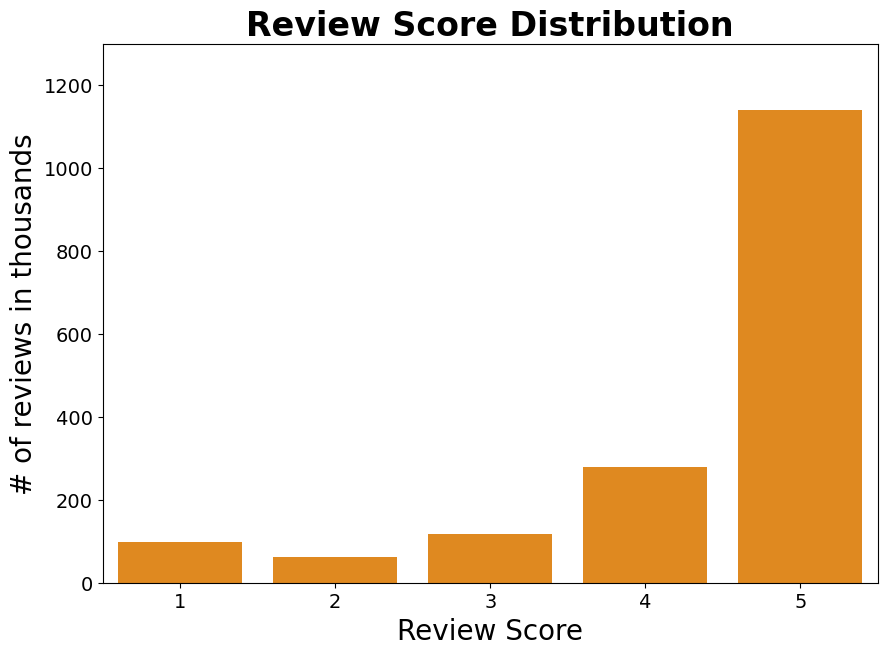

In [51]:
plt.figure(figsize = (10,7))

# Separate the count of the values in the specific column
x_val = clean_df['reviewScore'].value_counts().index
y_val =  clean_df['reviewScore'].value_counts().values/1000

# Make the barplot
sns.barplot(x = x_val, y = y_val, data = clean_df, color = 'darkorange')

plt.ylim([0,1300])

# Label the plot
plt.title(f'Review Score Distribution', fontweight = 'bold', fontsize = 24)
plt.xlabel('Review Score', fontsize = 20)
plt.ylabel('# of reviews in thousands', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()


From the bar chart above, the review score is highly left skewed. This may be caused by people only giving reviews when they love the product. When the product is bad or average, they don't leave a review.

## 4.2 What is the general distribution of all the categorical columns?<a class ='anchor' id='4.2distribution'></a>

**A function will be created to plot bar charts for the columns that are categorical.**

In [101]:
def bar_plotter(df_column,clean_df):
    
    plt.figure(figsize = (8,5))

    # Separate the count of the values in the specific column
    x_val = clean_df[df_column].value_counts().index
    y_val =  clean_df[df_column].value_counts().values

    # Make the barplot
    sns.barplot(x = x_val, y = y_val, data = clean_df, color = 'darkorange')

    # Label the plot
    plt.title(f'{df_column} Column Distribution')
    
    # When there are many x values, the labels will be rotated to be more readable
    if len(x_val) > 5:
        plt.xticks(rotation = 45)
    
    plt.xlabel(df_column)
    plt.ylabel('count')
    plt.show()


In [102]:
# Find categorical columns
clean_df.columns[0:11]

Index(['reviewScore', 'verified', 'vote', 'reviewDay', 'reviewMonth',
       'reviewYear', 'style_Amazon Video', 'style_Blu-ray', 'style_DVD',
       'style_Other', 'style_VHS Tape'],
      dtype='object')

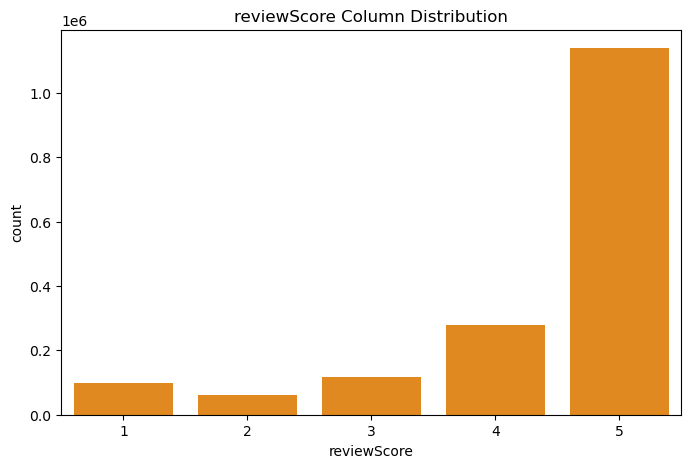

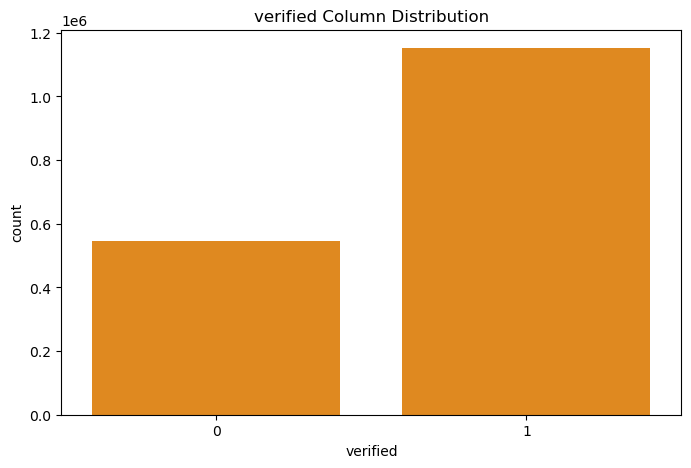

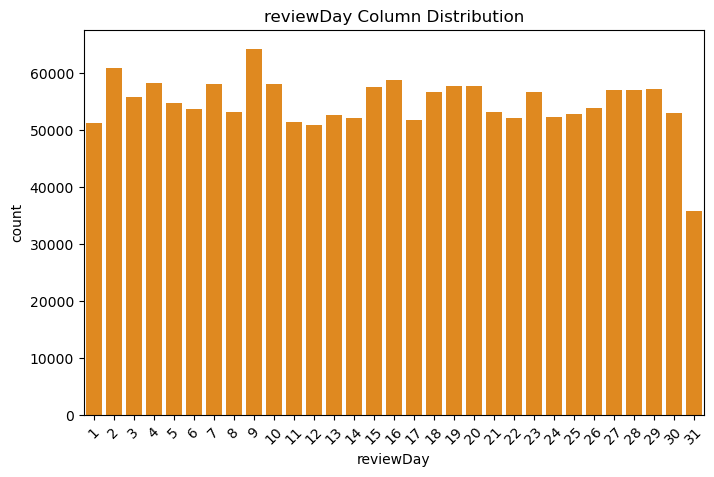

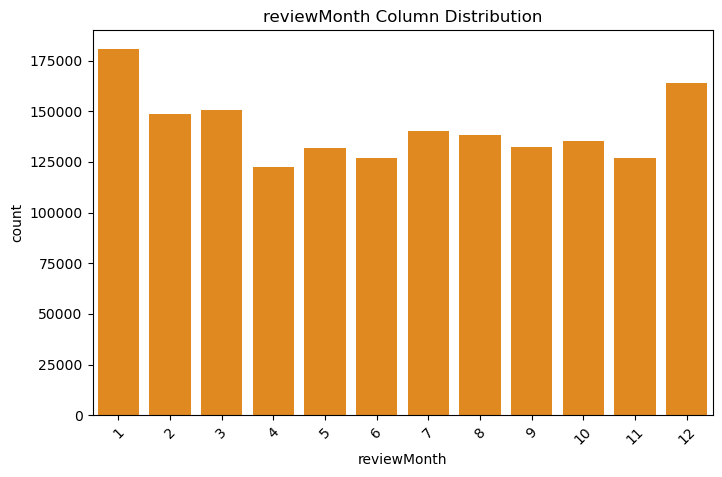

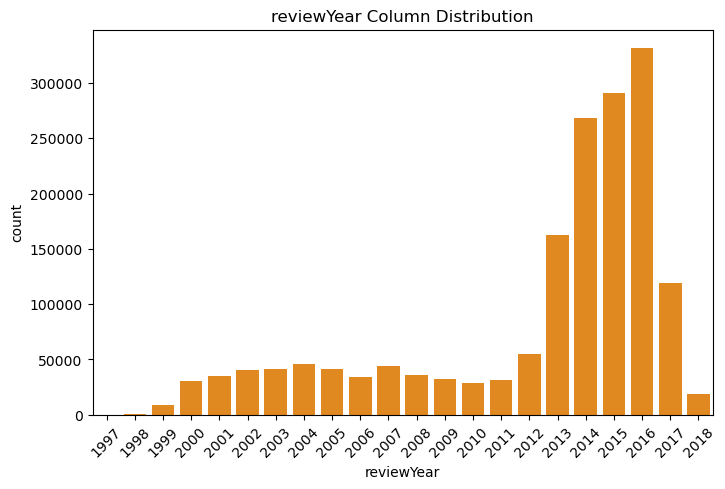

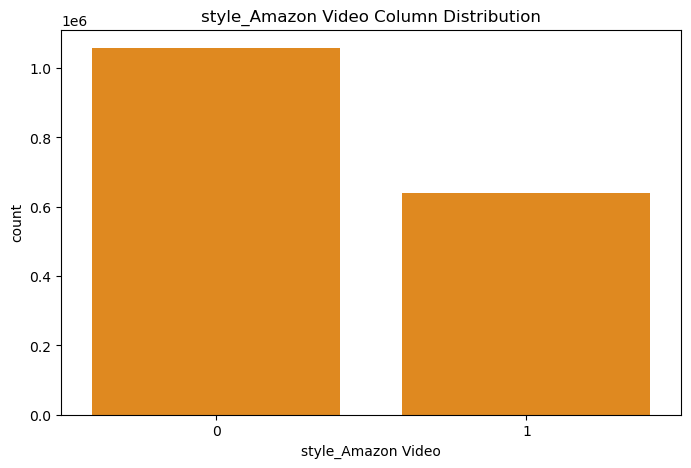

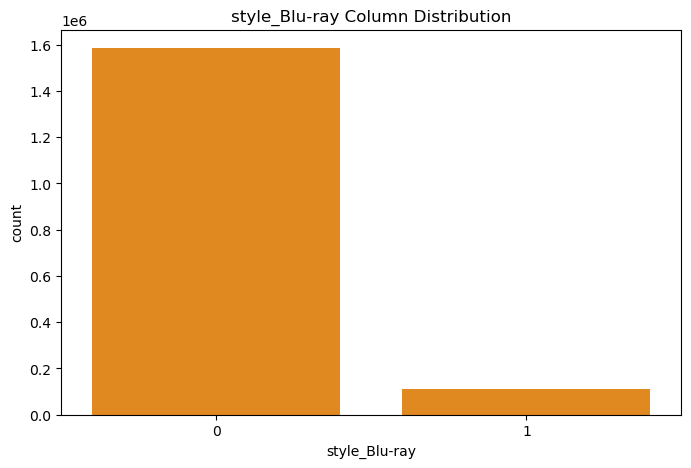

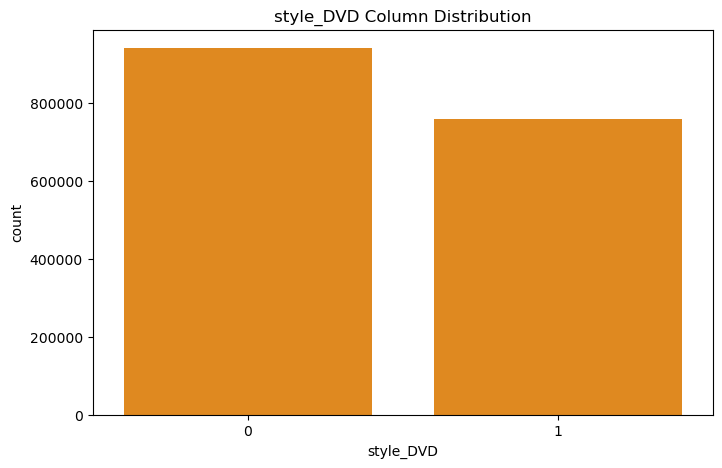

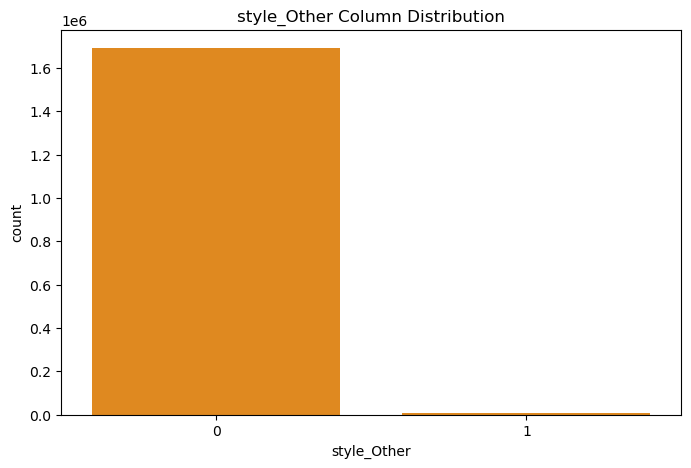

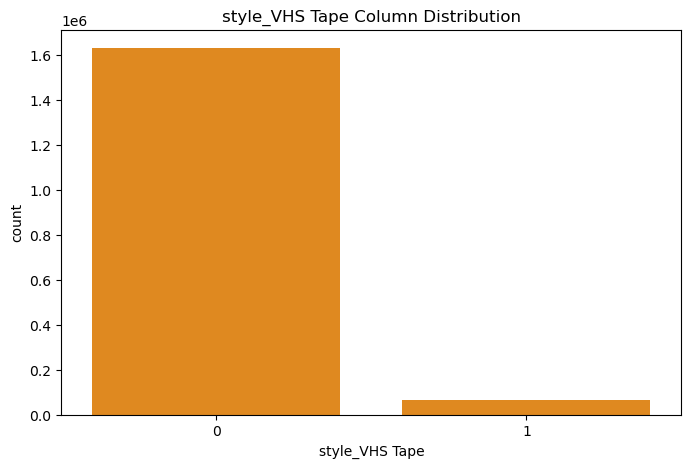

In [103]:
for column in clean_df.columns[0:11]:
    if column != 'vote':
        bar_plotter(column,clean_df)

None of the data in the columns look normally distributed.  
- The `reviewScore` is left skewed with most of the data rated at 5.  
- The `verified` had a two times higher count for '1' than '0', thus most reviews are verified.  
- The `reviewDay` column seems to have a random distribution with a much lower count on the 31st day of the month. This can be due to the fact that there are only 7 months in a year that has 31 days whereas almost every month/year has 30 days. 
- The `reviewMonth` plot shows a random distribution as well. The months with the most reviews are in December and January which is expected because people buy more items during the christmas/new year holidays and since there are more purchases, this would lead to more reviews.  
- The `reviewYear` plot shows a left skewed distribution with a peak of review counts in 2016 and a sudden drop in 2017 and 2018. This can be due to streaming platforms being more popular so less people are buying movies, thus there would be less reviews overall.  
- The `style` plots show that there is a big uneven distribution for styles such as VHS, other and BLU-RAY. This is the case because majority of the reviews are for the style Amazon video or DVDs.


## 4.3 What is the average review score over time?<a class ='anchor' id='4.3avgreviewscore'></a>

The review day and review month seem to be relatively distributed through the different days of the month and months of the year. A bar plot can be made to determine if the average review score changes over time.

**Average review score throughout the different years**

In [72]:
# Determine the average review Score for every year can be determined using mean() and a groupby function
reviewscore_Y =clean_df.groupby('reviewYear')['reviewScore'].mean()

#Check results
reviewscore_Y

The review scores don't seem to change much, a bar plot will be made to visualize these results.

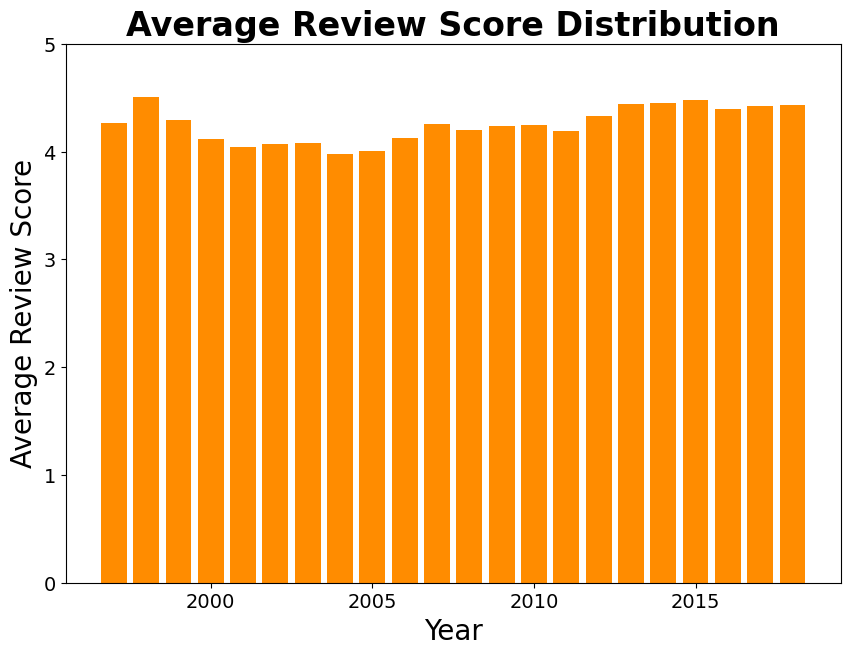

In [81]:
# Set up figure size
plt.figure(figsize = (10,7))

# Make bar plot using the index and values from above
plt.bar(reviewscore_Y.index, reviewscore_Y.values,  color = 'darkorange')

# Change size of tick labels
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Set y axis range
plt.ylim([0,5])

# Label the plot
plt.title(f'Average Review Score Distribution', fontweight = 'bold', fontsize = 24)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Average Review Score', fontsize = 20)


plt.show()

The average review score is relatively unchanged throughout the years but there is a lower average review score in the early 2000s than between 2010 to 2018.

**Average review score throughout the different months**

In [75]:
# Determine the average review Score for every month can be determined using mean() and a groupby function
reviewscore_M =clean_df.groupby('reviewMonth')['reviewScore'].mean()

# Check results
reviewscore_M

reviewMonth
1     4.381595
2     4.370647
3     4.368980
4     4.337486
5     4.325104
6     4.339689
7     4.342724
8     4.345854
9     4.338892
10    4.333328
11    4.345605
12    4.379311
Name: reviewScore, dtype: float64

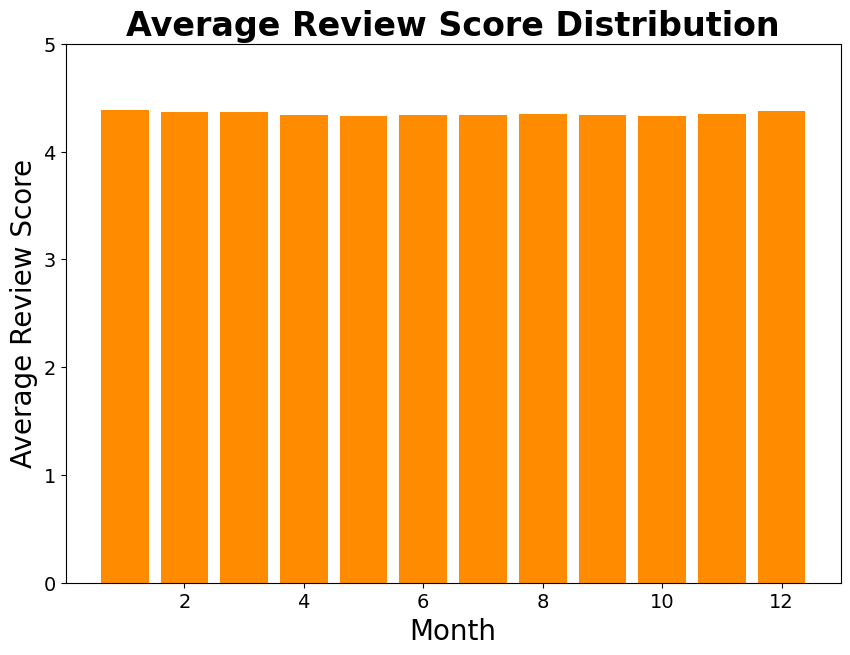

In [80]:
# Set up figure size
plt.figure(figsize = (10,7))

# Make bar plot using the index and values from above
plt.bar(reviewscore_M.index, reviewscore_M.values,  color = 'darkorange')

# Change size of tick labels
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Set y axis range
plt.ylim([0,5])

# Label the plot
plt.title(f'Average Review Score Distribution', fontweight = 'bold', fontsize = 24)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Average Review Score', fontsize = 20)

plt.show()

The average review score is unchanged throughout different months of the year thus showing that review scores are not dependent on the month of the year.

**Average Review Score when grouping by the month and year**

Since the average review is not changing much by year, the data can be grouped by month and year to see a more granular view of the average review score over time

In [61]:
reviewscore_Y_M =clean_df.groupby(['reviewYear','reviewMonth'])['reviewScore'].mean()

dates = []
for val in reviewscore_Y_M.index:
    dates.append(datetime(val[0],val[1],1))

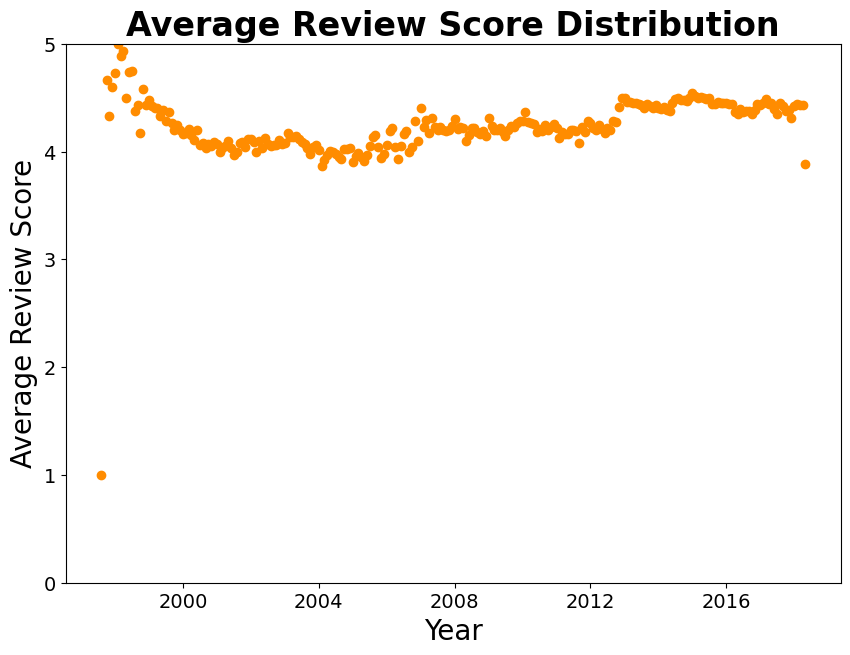

In [83]:
# Set up figure size
plt.figure(figsize = (10,7))

# Make bar plot using the index and values from above
plt.scatter(dates, reviewscore_Y_M.values,  color = 'darkorange')

# Change size of tick labels
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

# Set y axis range
plt.ylim([0,5])

# Label the plot
plt.title(f'Average Review Score Distribution', fontweight = 'bold', fontsize = 24)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Average Review Score', fontsize = 20)

plt.show()

The average review score start out very high in 1996 and decreases to a minimum average review score of about 3.9 in around 2004. Then the average review scores start increasing all the way until 2018 which is the timespan of the dataset. There are 2 outliars in the data, one in 1996 and one in 2018. These outliars may be caused by the lack of data points for those two dates. The count of these two time periods can be explored.

In [108]:
# Determine count of reviews for Year, Month combinations
clean_df.groupby(['reviewYear','reviewMonth'])['reviewScore'].count()

reviewYear  reviewMonth
1997        8                 1
            10                3
            11                6
            12                5
1998        1                11
                           ... 
2018        1              6709
            2              5250
            3              4757
            4              2055
            5               142
Name: reviewScore, Length: 249, dtype: int64

As expected, there is only one review in August of 1997 which resulted in the outliar. There are 142 reviews in May of 2018. Since the AverageScore was low for that point, this can be due to people rating products lower during that month of the year.

## 4.4 Is there a trend to the verified review counts over time?<a class ='anchor' id='4.4verifiedtrend'></a>

**Count of verified when looking at the month and year**

In [63]:
verified_Y_M =clean_df[clean_df['verified'] == 1].groupby(['reviewYear','reviewMonth'])['verified'].count()

not_verified_Y_M =clean_df[clean_df['verified'] == 0].groupby(['reviewYear','reviewMonth'])['verified'].count()
verified_dates = []
for val in verified_Y_M.index:
    verified_dates.append(datetime(val[0],val[1],1))
    
not_verified_dates =[]    
for val in not_verified_Y_M.index:
    not_verified_dates.append(datetime(val[0],val[1],1))

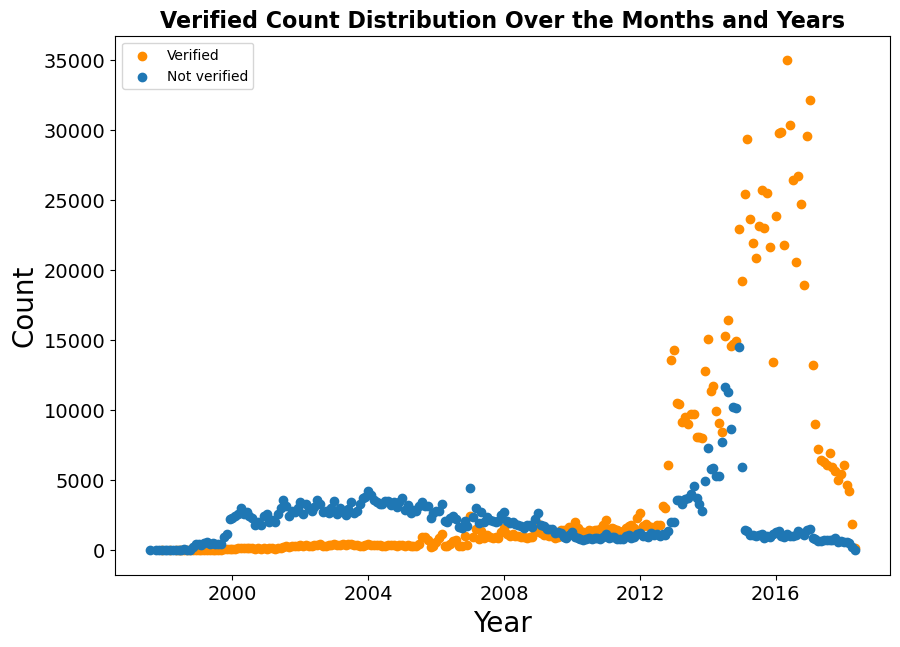

In [88]:
plt.figure(figsize = (10,7))

plt.scatter(verified_dates,verified_Y_M, color = 'darkorange', label = 'Verified')
plt.scatter(not_verified_dates,not_verified_Y_M, label = 'Not verified')

# Change size of tick labels
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


# Label the plot
plt.title('Verified Count Distribution Over the Months and Years', fontweight = 'bold', fontsize = 16)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

plt.legend()
plt.show()

From the plot above, the non verified reviews were dominating the reviews between 2000 to 2009. This means that these reviews may be inaccurate because the reviewer may not have actually bought the product to know if the product is good or not. The verified reviews increase drastically from 2012 to 2018 which can be caused by the customer influx into the Amazon ecosystem. More people are buying products on Amazon which inherently leads to more potential reviews. The non verified reviews start decreasing in 2015 which is good because people who bought the products can give a better review than those who didn't purchase the product.

## 4.5 What is the distribution of the Votes column?<a class ='anchor' id='4.5votesdistribution'></a>

In [90]:
vote_count = clean_df['vote'].value_counts()

# Check results
vote_count

0      1407058
2        95490
3        52428
4        33284
5        22774
        ...   
469          1
741          1
481          1
263          1
774          1
Name: vote, Length: 492, dtype: int64

Most reviews had 0 votes and many reviews had below 5 votes.

In [94]:
top_vote_counts = clean_df['vote'].value_counts().head(5)/clean_df.shape[0]

# Check results

top_vote_counts

0    0.828533
2    0.056228
3    0.030872
4    0.019599
5    0.013410
Name: vote, dtype: float64

In [95]:
top_vote_counts.sum()

0.9486419279106235

About 83% of the reviews have 0 votes which is an extremely high percentage that will certainly skew the `vote` data. 95% of the review data have under 5 votes.

## 4.6 Feature Correlations<a class ='anchor' id='4.6featurecorrelation'></a>

Show correlations between different features

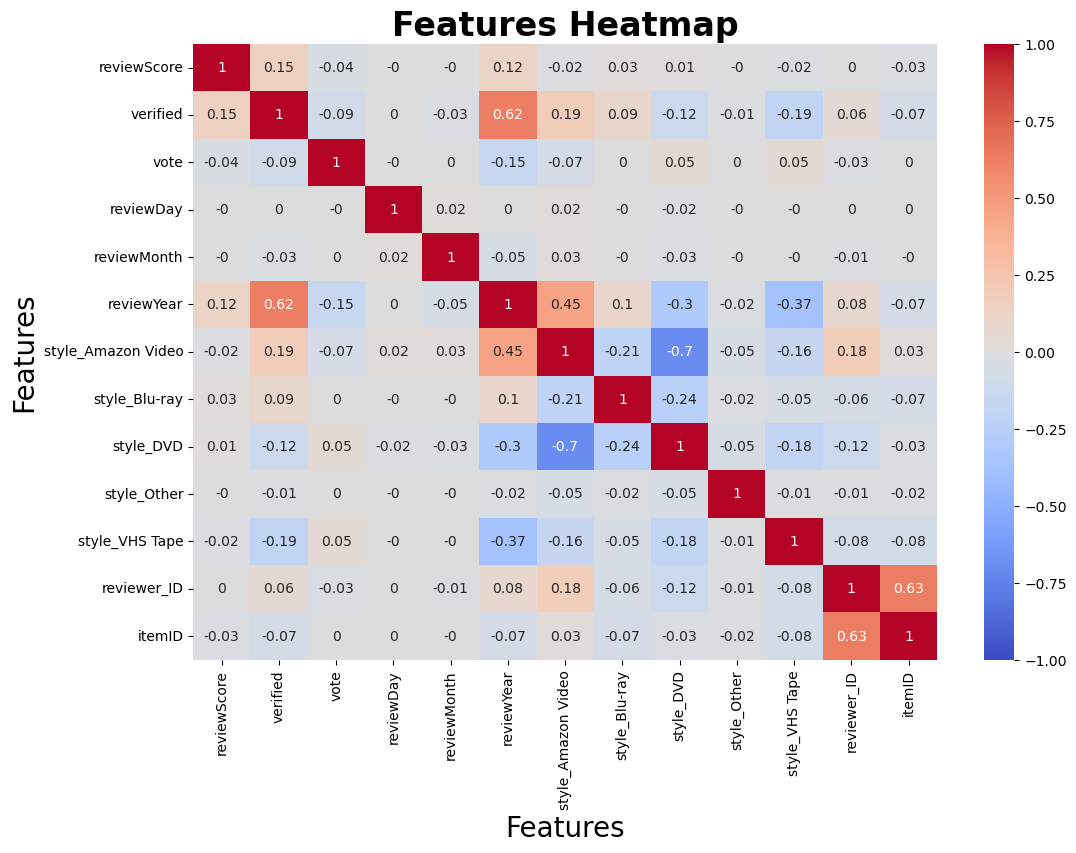

In [99]:
plt.figure(figsize= [12,8])
sns.heatmap(clean_df.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Features Heatmap', fontweight = 'bold', fontsize = 24)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Features', fontsize = 20)
plt.show()

**ReviewScore Correlation**:   

Looking at the reviewScore, there is a small positive correlation between reviewScore and verified as well as reviewScore reviewYear. All the other columns are close to 0 thus there seems to be no correlation between reviewScore and the other columns

**Verified Correlation**:  

There seems to be a strong positive correlation between verified and reviewYear thus a boxplot will be made to visualize the relation.

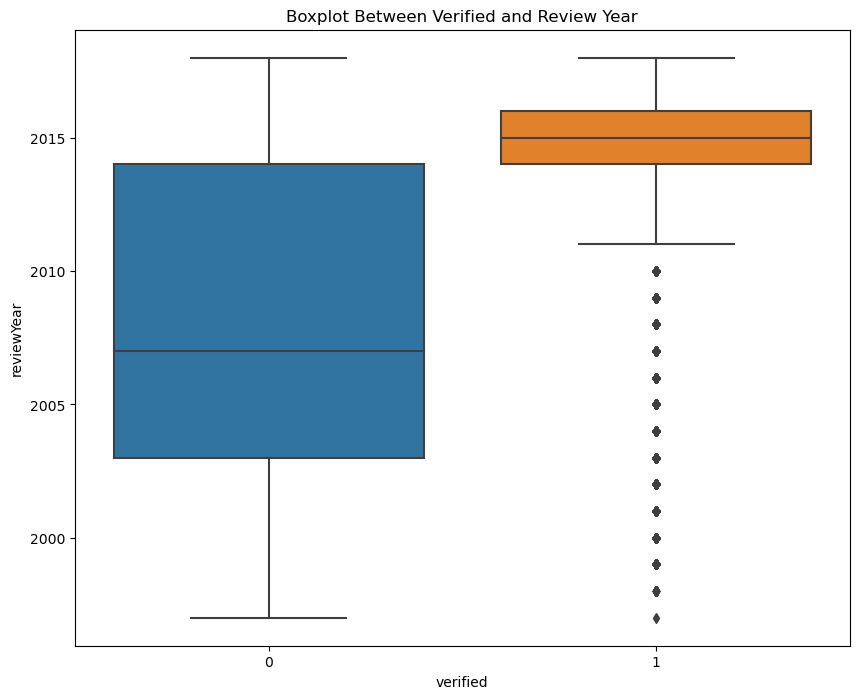

In [70]:
plt.figure(figsize =(10,8))
sns.boxplot(data = clean_df, x ='verified',y = 'reviewYear')
plt.title('Boxplot Between Verified and Review Year')
plt.show()

**Style_Amazon Video Correlation**:  

There seems to be a strong positive correlation between the Amazon video Style and reviewYear thus a boxplot will be made to visualize the relation.

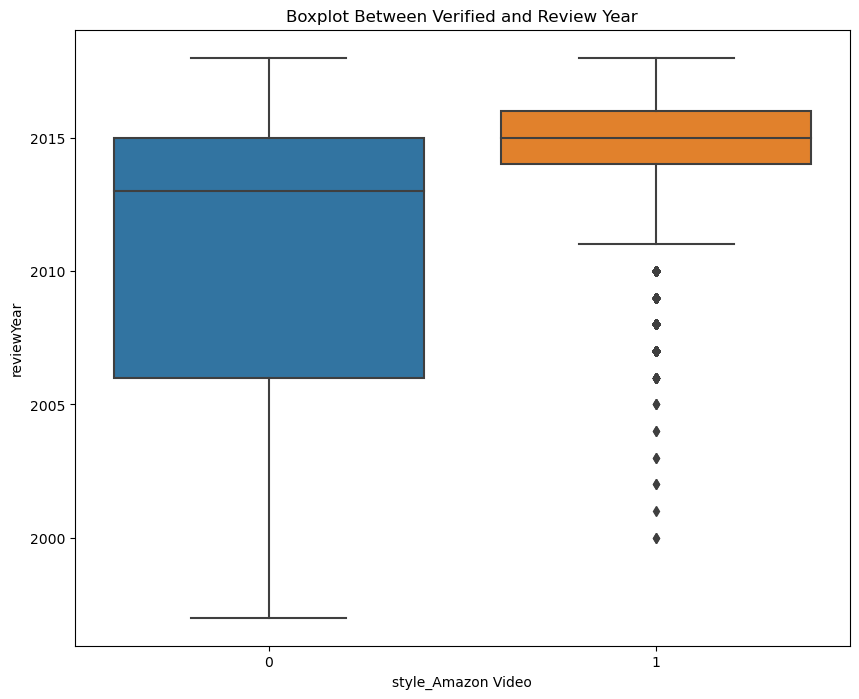

In [71]:
plt.figure(figsize =(10,8))
sns.boxplot(data = clean_df, x ='style_Amazon Video',y = 'reviewYear')
plt.title('Boxplot Between Verified and Review Year')
plt.show()

From the above boxplot, there are many outliars for the the Amazon made videos before 2011. This may be the case because of Amazon's rapid growth as the company expands towards creating their own streaming content on their streaming platform. 

**Negative Correlations**:  

Some of the styles have negative correlations with one another which is reasonable because each data point cotains a review and if the review is for a specific style, it can't be the other styles. Thus creating a negative correlation.

# 5. Conclusion for Preprocessing and EDA<a class ='anchor' id='5conclusion'></a>

As expected, the numeric features such as review date, the style of the movie/tv show, if the reviewer is verified or not and the amount of upvotes on the review do not influence the outcome of the review score. This can be the case because the review score mainly depends on if the buyer loves or hates the product and the information can be found in the review text.